In [1]:
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import pickle

In [2]:
# Loading the pre-processed DataFrame from a pickle file
with open('flatfile.pkl', 'rb') as file:
    loaded_data = pickle.load(file)
df = loaded_data
df.info()  # Displaying information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     4008 non-null   int64   
 1   counts_pictures         4008 non-null   int64   
 2   counts_profileVisits    4008 non-null   int64   
 3   counts_kisses           4008 non-null   int64   
 4   flirtInterests_chat     4008 non-null   int64   
 5   flirtInterests_friends  4008 non-null   int64   
 6   flirtInterests_date     4008 non-null   int64   
 7   isVIP                   4008 non-null   int64   
 8   isVerified              4008 non-null   int64   
 9   lastOnlineTs            4007 non-null   float64 
 10  lang_count              4008 non-null   int64   
 11  lang_fr                 4008 non-null   int64   
 12  lang_de                 4008 non-null   int64   
 13  count

# **Categorical String Data**

In [3]:
# Extracting all categorical columns from the DataFrame
categorical_cols = df.select_dtypes(include=['category']).columns.tolist()
categorical_df_s = df[categorical_cols]
categorical_df_s.info()  # Displaying information about categorical columns

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   genderLooking     4008 non-null   category
 1   nameN             4008 non-null   category
 2   cityN             4008 non-null   category
 3   locationCityN     4008 non-null   category
 4   locationCitySubN  4008 non-null   category
 5   countryN          4008 non-null   category
dtypes: category(6)
memory usage: 55.9+ KB


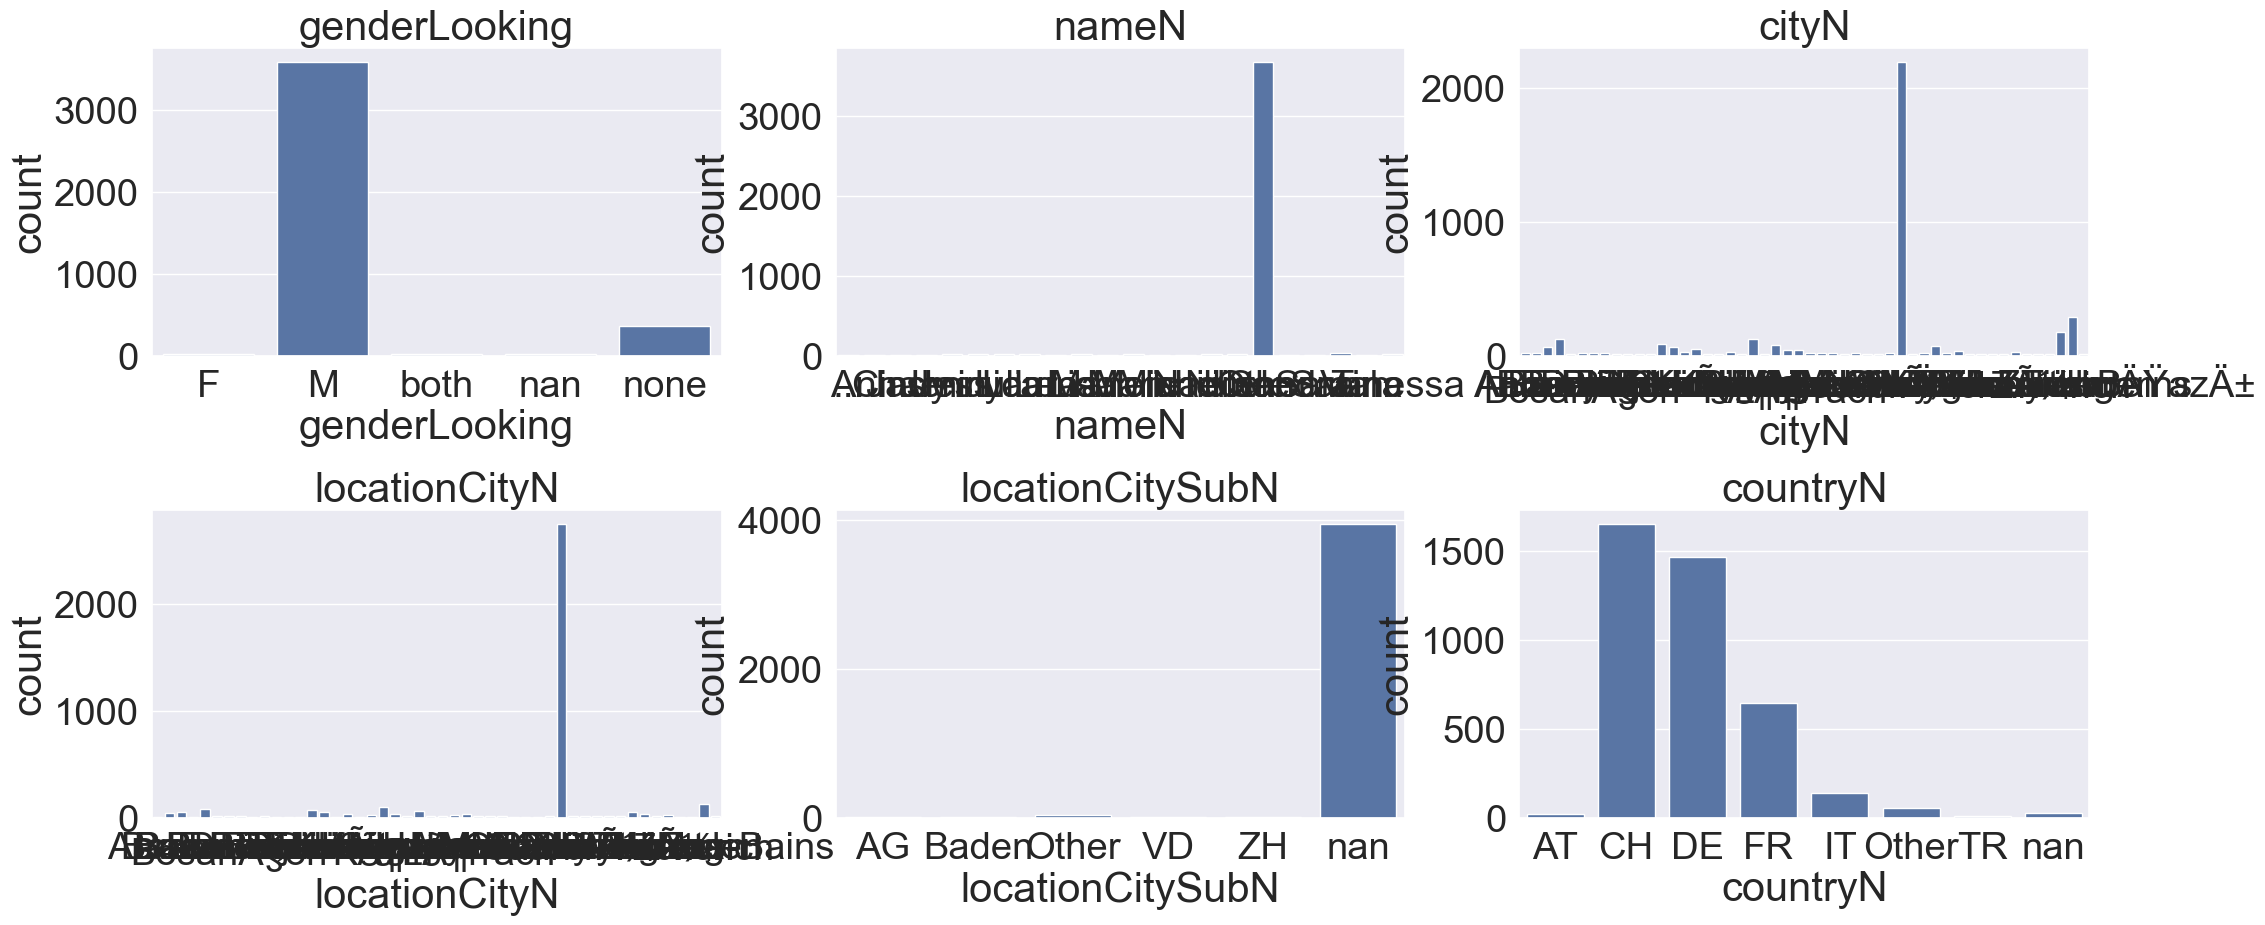

In [4]:
# Defining a lambda function to plot categorical data using seaborn
plot_categorical = lambda col: sb.countplot(x=col, data=categorical_df_s)

# Setting up parameters for plotting
a = 2  # Number of rows
b = 3  # Number of columns
c = 1  # Plot counter

fig = plt.figure(figsize=(25, 10))  # Creating a figure for subplots
plt.subplots_adjust(hspace=0.5)  # Adjusting the horizontal space between plots
sb.set(font_scale=2.5)  # Setting the font scale for seaborn

# Looping through each categorical column and creating count plots
for i in categorical_df_s:
    plt.subplot(a, b, c)
    plt.title(f'{i}')
    plt.xlabel(i)
    sb.countplot(x=categorical_df_s[i])
    c += 1

plt.show()  # Displaying all plots

# **Numeric Data Analysis**

In [5]:
# Extracting all numeric columns from the DataFrame
con_cols = df.select_dtypes(exclude=['category']).columns.tolist()
con_df = df[con_cols]

# Identifying columns that are actual numeric columns (more than 2 unique values)
num_col_list = []
for col in con_cols:
    if con_df[col].nunique() > 2:
        num_col_list.append(col)
num_col_list

['age',
 'counts_pictures',
 'counts_profileVisits',
 'counts_kisses',
 'lastOnlineTs',
 'lang_count',
 'countDetails',
 'distance',
 'counts_fans',
 'counts_g']

In [6]:
num_col_df = df[num_col_list]
num_col_df.head()

,age,counts_pictures,counts_profileVisits,counts_kisses,lastOnlineTs,lang_count,countDetails,distance,counts_fans,counts_g
userId,,,,,,,,,,
4e3842f79b70e7ea57000064,25,4,8279,239,1.429995e+09,1,1.00,175.0,0.0,3.0
4e3d34bf5d2bce7b160006a3,22,5,663,13,1.430040e+09,3,0.85,138.0,0.0,0.0
4eef8b81ebf2c8f64000000c,20,3,22187,1015,1.428406e+09,2,0.12,77.3,2.0,3.0
4ef9434cca61bece6a000002,24,18,7339,180,1.428504e+09,2,0.81,194.0,0.0,2.0
4f10cbc1883fa97a5f000015,24,13,18672,492,1.430163e+09,5,0.65,318.0,0.0,1.0


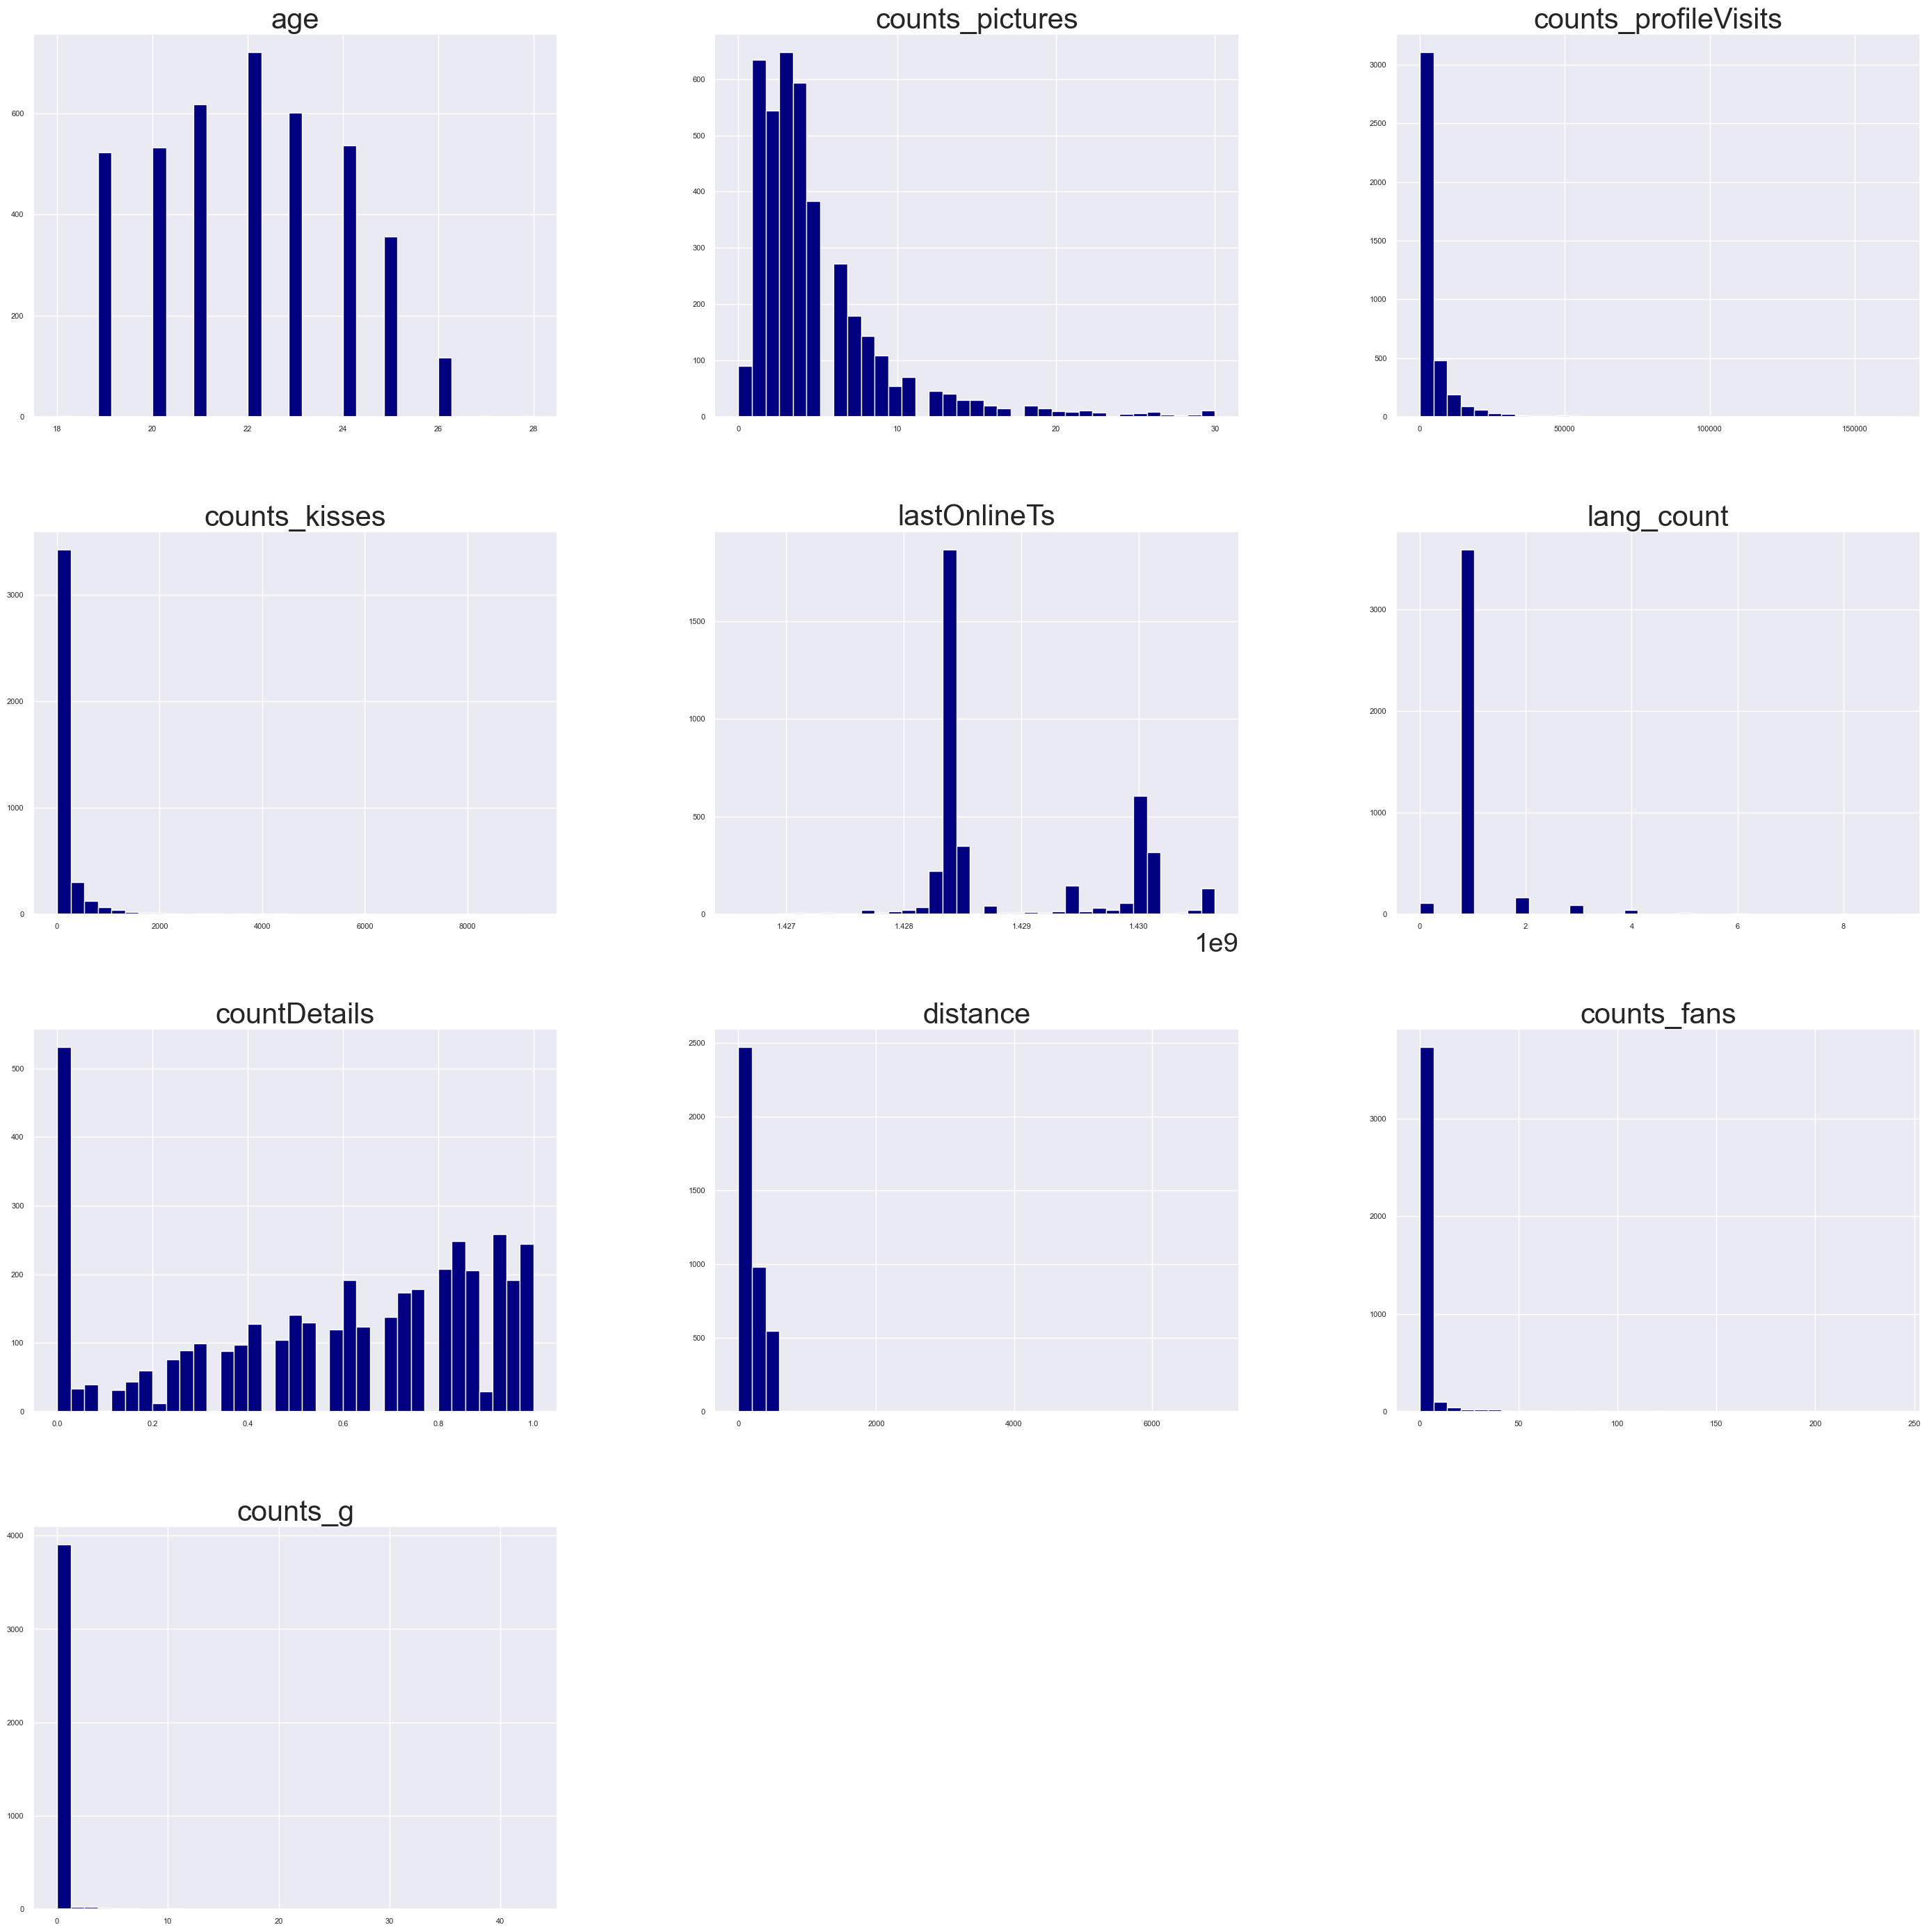

In [7]:
# Plotting histograms for all numeric columns
num_col_df.hist(figsize=(35, 35), bins=35, xlabelsize=8, ylabelsize=8, color="navy");

In [8]:
num_col_df.info()
num_col_df = num_col_df.drop(columns=['lang_count', 'counts_g'])  # Dropping unnecessary columns

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   4008 non-null   int64  
 1   counts_pictures       4008 non-null   int64  
 2   counts_profileVisits  4008 non-null   int64  
 3   counts_kisses         4008 non-null   int64  
 4   lastOnlineTs          4007 non-null   float64
 5   lang_count            4008 non-null   int64  
 6   countDetails          4008 non-null   float64
 7   distance              4008 non-null   float64
 8   counts_fans           3983 non-null   float64
 9   counts_g              3983 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 473.5+ KB


In [9]:
# Checking for skewness in numeric columns and applying conditional formatting
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
        
pd.DataFrame(num_col_df.skew(), columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)

C:\Users\matar.aviv\AppData\Local\Temp\ipykernel_39028\10878714.py:10: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  pd.DataFrame(num_col_df.skew(), columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)


,skewness
distance,13.818340
counts_fans,10.894589
counts_kisses,8.632746
counts_profileVisits,6.152877
counts_pictures,2.415276
lastOnlineTs,0.695919
age,0.122768
countDetails,-0.490383


# **Categorical (Numeric & Boolean)**

In [10]:
# Identifying numeric columns that are actually binary (Boolean) or categorical
cat_num_col = ['lang_count', 'counts_g']
for col in con_cols:
    if con_df[col].nunique() == 2:
        cat_num_col.append(col)
cat_num_col

['lang_count',
 'counts_g',
 'flirtInterests_chat',
 'flirtInterests_friends',
 'flirtInterests_date',
 'isVIP',
 'isVerified',
 'lang_fr',
 'lang_de',
 'flirtstar',
 'hasBirthday',
 'mobile',
 'online',
 'connectedToFacebook',
 'locked',
 'isInfluencer',
 'shareProfileEnabled',
 'isfreshman',
 'crypt',
 'isSystemProfile',
 'ISpicture',
 'ISinsta2',
 'ISemoji2',
 'IS_lang_pt_es_en_it']

In [11]:
cat_num_df = df[cat_num_col]
cat_num_df.head()

,lang_count,counts_g,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,isVIP,isVerified,lang_fr,lang_de,flirtstar,...,locked,isInfluencer,shareProfileEnabled,isfreshman,crypt,isSystemProfile,ISpicture,ISinsta2,ISemoji2,IS_lang_pt_es_en_it
userId,,,,,,,,,,,,,,,,,,,,,
4e3842f79b70e7ea57000064,1,3.0,1,1,1,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0
4e3d34bf5d2bce7b160006a3,3,0.0,1,1,1,0,0,1,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,1
4eef8b81ebf2c8f64000000c,2,3.0,1,1,0,0,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0,1
4ef9434cca61bece6a000002,2,2.0,1,0,1,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,1
4f10cbc1883fa97a5f000015,5,1.0,0,1,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0,1


In [12]:
# Categorical String Data - `categorical_df_s`
# Numeric Data - `num_col_df`
# Categorical Numeric & Boolean Data - `cat_num_df`

# **Correlation Analysis**

In [13]:
# Calculating and visualizing the correlation matrix for numeric data
num_col_df.corr()

,age,counts_pictures,counts_profileVisits,counts_kisses,lastOnlineTs,countDetails,distance,counts_fans
age,1.000000,-0.085162,-0.078700,-0.056747,-0.052327,-0.047105,0.133934,0.020792
counts_pictures,-0.085162,1.000000,0.418122,0.367735,0.087362,0.332854,-0.060471,0.094016
counts_profileVisits,-0.078700,0.418122,1.000000,0.885258,0.105007,0.150863,-0.038796,0.134001
counts_kisses,-0.056747,0.367735,0.885258,1.000000,0.055995,0.124617,-0.040065,0.125710
lastOnlineTs,-0.052327,0.087362,0.105007,0.055995,1.000000,0.062688,-0.223641,0.008119
countDetails,-0.047105,0.332854,0.150863,0.124617,0.062688,1.000000,0.011683,0.084383
distance,0.133934,-0.060471,-0.038796,-0.040065,-0.223641,0.011683,1.000000,-0.001410
counts_fans,0.020792,0.094016,0.134001,0.125710,0.008119,0.084383,-0.001410,1.000000


<Axes: >

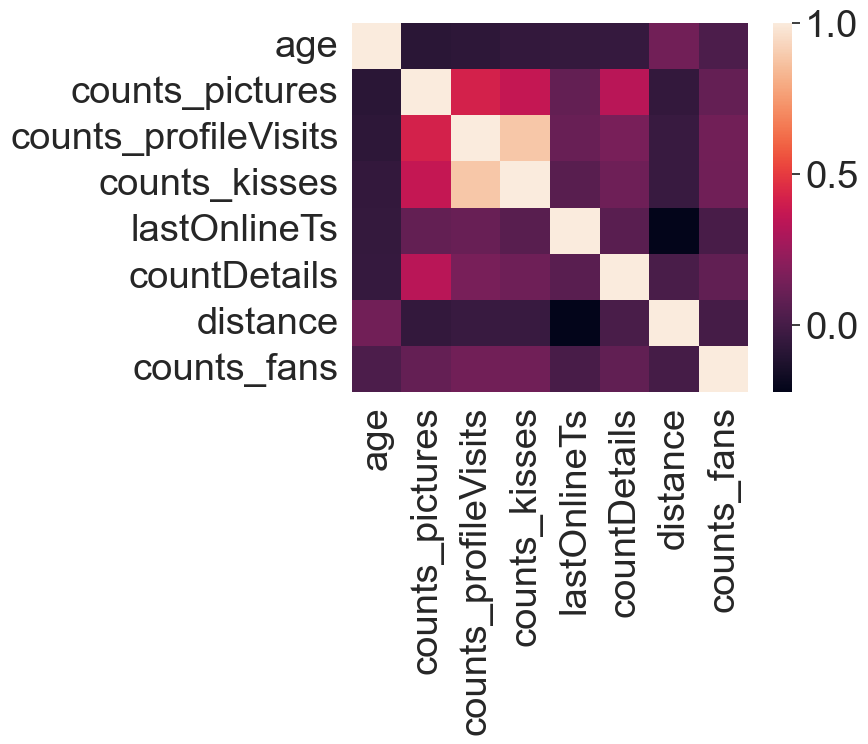

In [14]:
sb.heatmap(num_col_df.corr())

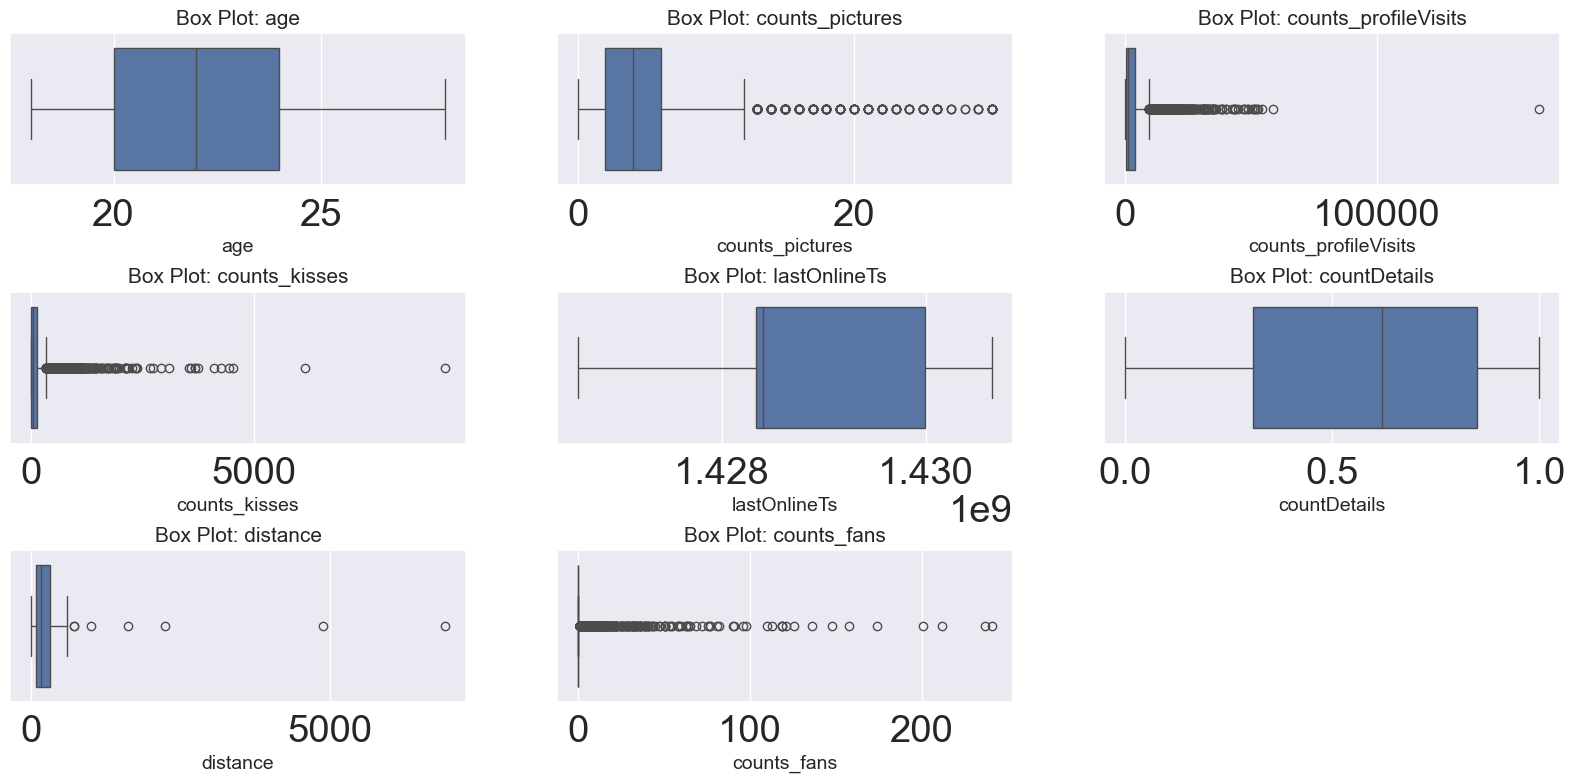

In [15]:
plt.figure(figsize=(20, 200))

# Defining a function to plot outliers using box plots for each numeric column
def outliers_boxplot(df):
    for i, col in enumerate(df.columns):
        ax = plt.subplot(60, 3, i + 1)
        sb.boxplot(data=df, x=col, ax=ax)
        plt.subplots_adjust(hspace=0.7)
        plt.title('Box Plot: {}'.format(col), fontsize=15)
        plt.xlabel('{}'.format(col), fontsize=14)

outliers_boxplot(num_col_df)

# **Outlier Treatment**

In [16]:
# Defining a function to identify and treat outliers using the Interquartile Range (IQR)
def treat_outliers(df, features):
    df_outliers = pd.DataFrame(index=df.index)
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_outliers[feature] = ((df[feature] < lower_bound) | (df[feature] > upper_bound)).astype(int)
    return df_outliers

In [17]:
# Applying the outlier treatment function to numeric columns
outliers_df = treat_outliers(df, num_col_df.columns.tolist())
outliers_df

,age,counts_pictures,counts_profileVisits,counts_kisses,lastOnlineTs,countDetails,distance,counts_fans
userId,,,,,,,,
4e3842f79b70e7ea57000064,0,0,0,0,0,0,0,0
4e3d34bf5d2bce7b160006a3,0,0,0,0,0,0,0,0
4eef8b81ebf2c8f64000000c,0,0,1,1,0,0,0,1
4ef9434cca61bece6a000002,0,1,0,0,0,0,0,0
4f10cbc1883fa97a5f000015,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
55229e2fe66da132848b45a9,0,0,0,0,0,0,0,0
55229eb5e56da11a2c8b45a6,0,0,0,0,0,0,0,0
CRY8ewgkIz8Bc5zolbHipFKd8z3jBxHv5pFTT8hCyKRdRyXiugVQ4sVCQ==,0,0,0,1,0,0,0,0


In [18]:
# Creating a table for outliers change
out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'])
out_df

,feature,outliers_cnt,distribution_changed,correlation_changed


In [19]:
# Checking distribution and correlation changes after outlier removal
for col in num_col_df.columns.tolist():
    out = df[col]
    non_out = df[col][outliers_df[col] == 0]
    cor_out = df['counts_kisses']
    cor_non_out = df['counts_kisses'][outliers_df[col] == 0]
    
    # Filtering out NaN values for correlation calculation
    valid_out = ~np.isnan(out) & ~np.isnan(cor_out)
    valid_non_out = ~np.isnan(non_out) & ~np.isnan(cor_non_out)
    
    if valid_out.sum() > 1 and valid_non_out.sum() > 1:
        cor_change = '+' if abs(np.corrcoef(out[valid_out], cor_out[valid_out])[0, 1] - 
                                np.corrcoef(non_out[valid_non_out], cor_non_out[valid_non_out])[0, 1]) > 0.05 else '-'
    else:
        cor_change = '-'

    dist_change = '+' if ks_2samp(out.dropna(), non_out.dropna())[1] < 0.05 else '-'

    new_row = pd.DataFrame({'feature': [col],
                            'outliers_cnt': [outliers_df[col].sum()],
                            'distribution_changed': [dist_change],
                            'correlation_changed': [cor_change]})

    out_df = pd.concat([out_df, new_row], ignore_index=True)
out_df
# Decision: Not to drop outliers

C:\Users\matar.aviv\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\matar.aviv\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,feature,outliers_cnt,distribution_changed,correlation_changed
0,age,0,-,-
1,counts_pictures,242,+,+
2,counts_profileVisits,415,+,+
3,counts_kisses,448,+,-
4,lastOnlineTs,0,-,-
5,countDetails,0,-,-
6,distance,7,-,-
7,counts_fans,968,+,-


In [20]:
# Displaying the most significant outlier
df.loc['519f8018140ba0df4000015b']

age                                 23
counts_pictures                     16
counts_profileVisits            164425
counts_kisses                     9288
flirtInterests_chat                  1
flirtInterests_friends               1
flirtInterests_date                  1
isVIP                                0
isVerified                           1
lastOnlineTs              1429443773.0
lang_count                           2
lang_fr                              0
lang_de                              1
countDetails                       1.0
flirtstar                            0
hasBirthday                          0
distance                         490.0
mobile                               1
online                               1
connectedToFacebook                0.0
locked                             0.0
genderLooking                        M
counts_fans                        0.0
counts_g                          39.0
isInfluencer                       0.0
shareProfileEnabled      

In [21]:
# Saving the updated DataFrame to a pickle file
with open('df.pkl', 'wb') as f:
    pickle.dump(df, f)
